In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_prepare = train

In [5]:
train = train.drop(['Ticket', 'Cabin'], axis=1)

In [6]:
dataset = pd.DataFrame()
# 设立因子：人名
dataset['Title'] = train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
title_counts = dataset['Title'].value_counts()
title_counts

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [7]:
# 名字特征
train['NameParticular'] = dataset['Title']
train['NameParticular'] = train['NameParticular'].map( {'Mr': 0, 
                                                        'Mrs': 0, 
                                                        'Miss': 0,
                                                        'Mlle': 0,
                                                        'Ms': 0,
                                                        'Master': 1,
                                                        'Dr': 1,
                                                        'Countess': 1,
                                                        'Rev': 1, 
                                                        'Major': 1,
                                                        'Col': 1,
                                                        'Capt': 0,
                                                        'Lady': 0,
                                                        'Don': 0,
                                                        'Jonkheer': 0,
                                                        'Mme': 0,
                                                        'Sir': 0
                                                         } ).astype(int)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,NameParticular
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,0


In [8]:
#train = train.drop(['Name'], axis=1)
#train = train.drop(['Ticket'], axis=1)
#train = train.drop(['PassengerId'], axis=1)
train = train.drop(['Name'], axis=1)
#train = train.drop(['Cabin'], axis=1)
train.head(4)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameParticular
0,1,0,3,male,22.0,1,0,7.2500,S,0
1,2,1,1,female,38.0,1,0,71.2833,C,0
2,3,1,3,female,26.0,0,0,7.9250,S,0
3,4,1,1,female,35.0,1,0,53.1000,S,0


In [9]:
import seaborn as sns
import matplotlib as plt

In [10]:
train['Embarked'] = train['Embarked'].transform(lambda x:x.fillna('S'))
total = train.isnull().sum().sort_values(ascending=False)
total

Age               177
PassengerId         0
Survived            0
Pclass              0
Sex                 0
SibSp               0
Parch               0
Fare                0
Embarked            0
NameParticular      0
dtype: int64

In [11]:
#data = pd.concat([train['SibSp'], train['Age']], axis=1)
#data.plot.scatter(x='SibSp', y='Age')
train['sum'] = train['SibSp'] + train['Parch'] 
train
data = pd.concat([train['sum'], train['Age']], axis=1)

In [12]:
#train = pd.get_dummies(train, dropna=False)
train['sum'].value_counts()

sum
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

In [13]:
median_age_per_group =train.groupby('sum')['Age'].transform('median')
train['Age'] = train['Age'].fillna(median_age_per_group)
train['Age'].value_counts()

Age
29.50    133
29.00     42
24.00     30
18.00     30
22.00     27
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 89, dtype: int64

In [14]:
mean_age_per_group = train.groupby('Parch')['Age'].transform('mean')
train['Age'] = train['Age'].fillna(mean_age_per_group)

In [15]:
#为pre作准备
train_prepare['sum'] = train_prepare['SibSp'] + train_prepare['Parch'] 
median =train_prepare.groupby('sum')['Age'].transform('median')
train_prepare['Age'] = train_prepare['Age'].fillna(median)
mean = train_prepare.groupby('Parch')['Age'].transform('mean')
train_prepare['Age'] = train_prepare['Age'].fillna(mean)
total_prepare = train_prepare.isnull().sum().sort_values(ascending=False)
total_prepare

Cabin          687
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
sum              0
dtype: int64

In [16]:
import matplotlib.pyplot as plt

In [17]:
pd.crosstab([train.SibSp],train.Survived)

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [18]:
#判断是否单独一人
train['Single'] = 0
train.loc[train['sum']==0, 'Single'] = 1
train['sex'] = 0
train.loc[train['Sex']=='male', 'sex']=1
#train = train.drop(['PassengerId'], axis=1)
#fare的分类
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameParticular,sum,Single,sex
0,1,0,3,male,22.0,1,0,7.2500,S,0,1,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,0,1,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,1,0
3,4,1,1,female,35.0,1,0,53.1000,S,0,1,0,0
4,5,0,3,male,35.0,0,0,8.0500,S,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,1,0,1,1
887,888,1,1,female,19.0,0,0,30.0000,S,0,0,1,0
888,889,0,3,female,23.0,1,2,23.4500,S,0,3,0,0
889,890,1,1,male,26.0,0,0,30.0000,C,0,0,1,1


In [19]:
train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train['Sex'] = train['Sex'].map({'male':1, 'female':0}).astype(int)
#train = train.drop(['sex'], axis=1)
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameParticular,sum,Single,sex
0,1,0,3,1,22.0,1,0,7.2500,0,0,1,0,1
1,2,1,1,0,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,0,1,0
3,4,1,1,0,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,3,1,35.0,0,0,8.0500,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,0,1,0,1,1
887,888,1,1,0,19.0,0,0,30.0000,0,0,0,1,0
888,889,0,3,0,23.0,1,2,23.4500,0,0,3,0,0
889,890,1,1,1,26.0,0,0,30.0000,1,0,0,1,1


In [20]:
train['Cut_Age'] = pd.qcut(train['Age'], 5)
train[['Cut_Age', 'Survived']].groupby(['Cut_Age'],
                                        as_index=False).mean().sort_values(by='Cut_Age',
                                                                           ascending=True)

,Cut_Age,Survived
0,"(0.419, 20.0]",0.431579
1,"(20.0, 27.0]",0.384615
2,"(27.0, 29.5]",0.301980
3,"(29.5, 38.0]",0.444444
4,"(38.0, 80.0]",0.372881


In [21]:
train['Cut_Fare'] = pd.qcut(train['Fare'], 4)
train[['Cut_Fare', 'Survived']].groupby(['Cut_Fare'],
                                        as_index=False).mean().sort_values(by='Cut_Fare',
                                                                           ascending=True)

,Cut_Fare,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [22]:
train.loc[ train['Fare'] <= 7.91, 'Fare'] = 0
train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare'] = 1
train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31), 'Fare']   = 2
train.loc[ train['Fare'] > 31, 'Fare'] = 3
train['Fare'] = train['Fare'].astype(int)
train = train.drop(['Cut_Fare'], axis=1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameParticular,sum,Single,sex,Cut_Age
0,1,0,3,1,22.0,1,0,0,0,0,1,0,1,"(20.0, 27.0]"
1,2,1,1,0,38.0,1,0,3,1,0,1,0,0,"(29.5, 38.0]"
2,3,1,3,0,26.0,0,0,1,0,0,0,1,0,"(20.0, 27.0]"
3,4,1,1,0,35.0,1,0,3,0,0,1,0,0,"(29.5, 38.0]"
4,5,0,3,1,35.0,0,0,1,0,0,0,1,1,"(29.5, 38.0]"


In [23]:
train['Age'] = train_prepare['Age']
train['Age'].describe

<bound method NDFrame.describe of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    23.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>

In [24]:
train.loc[train['Age'] <= 12, 'Age'] = 3
train.loc[(train['Age'] > 12) & (train['Age'] <= 30), 'Age'] = -3
train.loc[(train['Age'] > 30) & (train['Age'] <= 65), 'Age'] = 0
train.loc[ train['Age'] > 65, 'Age'] = -2
train['Age'] = train['Age'].astype(int)
train['Age'].head()

0   -3
1    0
2   -3
3    0
4    0
Name: Age, dtype: int64

In [25]:
train = train.drop(['Cut_Age'], axis=1)
train = train.drop(['PassengerId'], axis=1)

In [26]:
train = train.drop(['sex'], axis=1)

In [27]:
train = train.drop(['sum'], axis=1)

In [28]:
train_drop_sib_parch = train.drop(['SibSp'], axis=1)
train_drop_sib_parch = train_drop_sib_parch.drop(['Parch'], axis=1)

<Axes: >

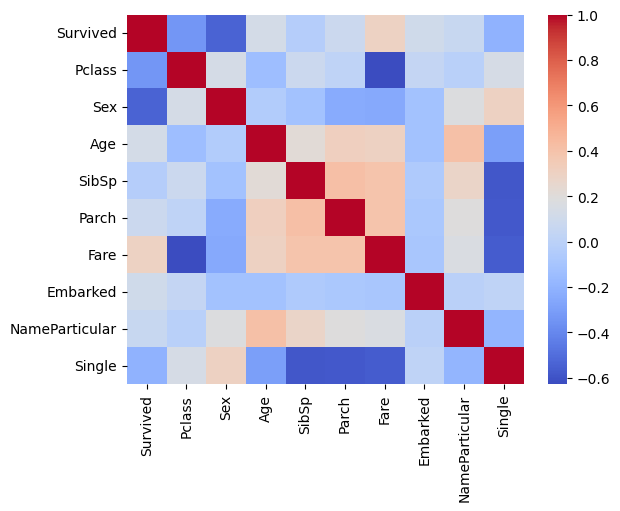

In [29]:
corrmat = train.corr()
sns.heatmap(corrmat,cmap='coolwarm')

In [30]:
# 定义颜色矩阵
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(8, 6))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

In [31]:
train['Age'].head(30)

0    -3
1     0
2    -3
3     0
4     0
5    -3
6     0
7     3
8    -3
9    -3
10    3
11    0
12   -3
13    0
14   -3
15    0
16    3
17   -3
18    0
19   -3
20    0
21    0
22   -3
23   -3
24    3
25    0
26   -3
27   -3
28   -3
29   -3
Name: Age, dtype: int64

In [32]:
train_parchandsibsp = pd.DataFrame({'Parch': train['Parch'],
                                   'SibSp': train['SibSp']})
train_parchandsibsp

,Parch,SibSp
0,0,1
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
886,0,0
887,0,0
888,2,1
889,0,0


In [33]:
train = train.drop(['SibSp', 'Parch'], axis=1)

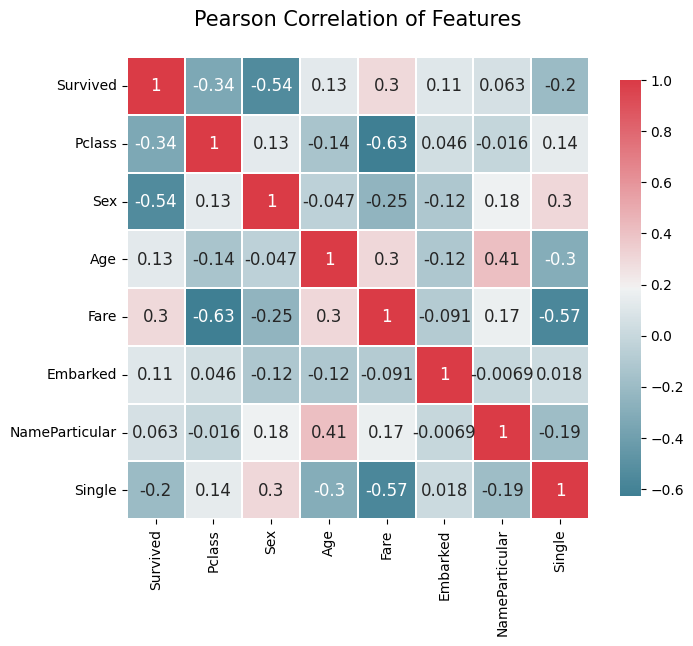

In [34]:
correlation_heatmap(train)

In [35]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,NameParticular,Single
0,0,3,1,-3,0,0,0,0
1,1,1,0,0,3,1,0,0
2,1,3,0,-3,1,0,0,1
3,1,1,0,0,3,0,0,0
4,0,3,1,0,1,0,0,1


In [36]:
# manupulate test dataset
test = pd.read_csv('/kaggle/input/titanic/test.csv')
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [37]:
datatest = pd.DataFrame()
datatest['Title'] = test['Name'].str.extract('([A-Za-z]+)\.', expand=False)

test['NameParticular'] = datatest['Title']
test['NameParticular'] = test['NameParticular'].fillna(0).map( {'Mr': 0, 
                                                        'Mrs': 0, 
                                                        'Miss': 0,
                                                        'Mlle': 0,
                                                        'Ms': 0,
                                                        'Master': 1,
                                                        'Dr': 1,
                                                        'Countess': 1,
                                                        'Rev': 1, 
                                                        'Major': 1,
                                                        'Col': 1,
                                                        'Capt': 0,
                                                        'Lady': 0,
                                                        'Don': 0,
                                                        'Jonkheer': 0,
                                                        'Mme': 0,
                                                        'Sir': 0
                                                         } ).fillna(0).astype(int)
train

,Survived,Pclass,Sex,Age,Fare,Embarked,NameParticular,Single
0,0,3,1,-3,0,0,0,0
1,1,1,0,0,3,1,0,0
2,1,3,0,-3,1,0,0,1
3,1,1,0,0,3,0,0,0
4,0,3,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...
886,0,2,1,-3,1,0,1,1
887,1,1,0,-3,2,0,0,1
888,0,3,0,-3,2,0,0,0
889,1,1,1,-3,2,1,0,1


In [38]:
#PCA
from sklearn.decomposition import PCA  
from sklearn.preprocessing import StandardScaler 

x = train.drop(['Survived'], axis=1)

# 对数据进行标准化处理 
scaler = StandardScaler()  
x_scaled = scaler.fit_transform(x)  
  
# 创建PCA对象，设置要保留的主成分数量  
# 在这个例子中，我们选择保留5个主成分  
pca = PCA(n_components=5)  
  
# 对标准化后的数据进行PCA分析  
x_pca = pca.fit_transform(x_scaled)  

# 将PCA处理后的数据转换为DataFrame，方便查看  
train_pca = pd.DataFrame(data=x_pca, columns=['1','2','3','4','5'])  
# df_pca['Target'] = y  
  
# 查看PCA处理后的数据  
print(train_pca.head())

          1         2         3         4         5
0 -1.018554  0.355664  0.160773 -1.073565 -1.358077
1  2.492148 -1.423643  0.590202  0.583826  0.413495
2 -0.979709 -0.777747  0.095845 -1.055831  0.572909
3  2.613072 -1.036032 -0.488019 -0.428278  0.422869
4 -0.874311  1.025709 -0.359275 -0.465916  0.584014


In [39]:
x_pca

array([[-1.018554  ,  0.35566422,  0.16077349, -1.07356487, -1.35807675],
       [ 2.49214805, -1.4236425 ,  0.59020192,  0.58382571,  0.41349471],
       [-0.97970871, -0.77774696,  0.09584493, -1.05583093,  0.57290871],
       ...,
       [ 0.52025389, -1.02920405,  0.53488195, -1.59984371, -0.80284557],
       [-0.11597126, -0.73551393, -0.7785951 ,  2.08547751, -0.11896415],
       [-1.6348739 ,  0.38288942,  1.95633211,  1.43454201,  0.76192764]])

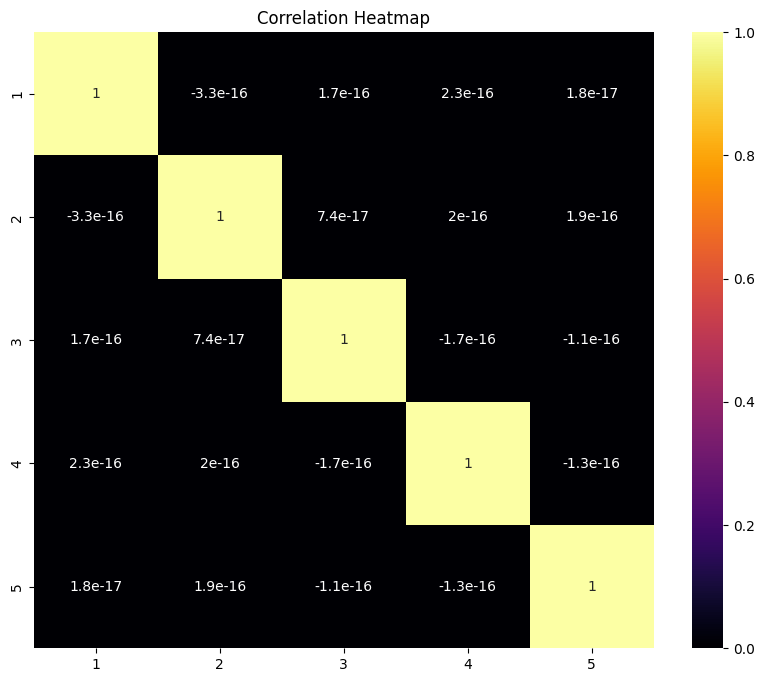

In [40]:
corr_matrix = train_pca.corr()  
# 绘制热力图  
plt.figure(figsize=(10, 8))  # 设置图形大小  
sns.heatmap(corr_matrix, annot=True, cmap='inferno')  # annot=True显示数值  
plt.title('Correlation Heatmap')  
plt.show()

In [41]:
#Name and Cabin
test = test.drop(['Ticket', 'Cabin', 'Name'], axis=1)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameParticular
0,892,3,male,34.5,0,0,7.8292,Q,0
1,893,3,female,47.0,1,0,7.0000,S,0
2,894,2,male,62.0,0,0,9.6875,Q,0
3,895,3,male,27.0,0,0,8.6625,S,0
4,896,3,female,22.0,1,1,12.2875,S,0


In [42]:
#sex
test.loc[test['Sex'] == 'male', 'Sex'] = 1
test.loc[test['Sex'] == 'female', 'Sex'] = 0
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameParticular
0,892,3,1,34.5,0,0,7.8292,Q,0
1,893,3,0,47.0,1,0,7.0000,S,0
2,894,2,1,62.0,0,0,9.6875,Q,0
3,895,3,1,27.0,0,0,8.6625,S,0
4,896,3,0,22.0,1,1,12.2875,S,0


In [43]:
test['Embarked'] = test['Embarked'].transform(lambda x:x.fillna('S'))

In [44]:
test['sum'] = test['SibSp'] + test['Parch'] 
median_age_per_group =test.groupby('sum')['Age'].transform('median')
test['Age'] = test['Age'].fillna(median_age_per_group)
mean_age_per_group = test.groupby('Parch')['Age'].transform('mean')
test['Age'] = test['Age'].fillna(mean_age_per_group)

In [45]:
#age
test.loc[test['Age'] <= 16, 'Age'] = 3
test.loc[(test['Age'] > 16) & (test['Age'] <= 30), 'Age'] = -3
test.loc[(test['Age'] > 30) & (test['Age'] <= 65), 'Age'] = 0
test.loc[ test['Age'] > 65, 'Age'] = -2
test['Age'] = test['Age'].astype(int)
test['Age'].head()

0    0
1    0
2    0
3   -3
4   -3
Name: Age, dtype: int64

In [46]:
test['Single'] = 0
test.loc[test['sum']==0, 'Single'] = 1
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameParticular,sum,Single
0,892,3,1,0,0,0,7.8292,Q,0,0,1
1,893,3,0,0,1,0,7.0000,S,0,1,0
2,894,2,1,0,0,0,9.6875,Q,0,0,1
3,895,3,1,-3,0,0,8.6625,S,0,0,1
4,896,3,0,-3,1,1,12.2875,S,0,2,0


In [47]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameParticular,sum,Single
0,892,3,1,0,0,0,7.8292,Q,0,0,1
1,893,3,0,0,1,0,7.0000,S,0,1,0
2,894,2,1,0,0,0,9.6875,Q,0,0,1
3,895,3,1,-3,0,0,8.6625,S,0,0,1
4,896,3,0,-3,1,1,12.2875,S,0,2,0


In [48]:
test['Embarked'] = test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameParticular,sum,Single
0,892,3,1,0,0,0,7.8292,2,0,0,1
1,893,3,0,0,1,0,7.0000,0,0,1,0
2,894,2,1,0,0,0,9.6875,2,0,0,1
3,895,3,1,-3,0,0,8.6625,0,0,0,1
4,896,3,0,-3,1,1,12.2875,0,0,2,0


In [49]:
total = test.isnull().sum().sort_values(ascending=False)
total

Fare              1
PassengerId       0
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Embarked          0
NameParticular    0
sum               0
Single            0
dtype: int64

In [50]:
test['Fare'].fillna(test['Fare'].median(), inplace=True)

In [51]:
test.loc[ test['Fare'] <= 7.91, 'Fare'] = 0
test.loc[(test['Fare'] > 7.91) & (test['Fare'] <= 14.454), 'Fare'] = 1
test.loc[(test['Fare'] > 14.454) & (test['Fare'] <= 31), 'Fare']   = 2
test.loc[ test['Fare'] > 31, 'Fare'] = 3
test['Fare'] = test['Fare'].astype(int)
#test = test.drop(['Cut_Fare'], axis=1)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameParticular,sum,Single
0,892,3,1,0,0,0,0,2,0,0,1
1,893,3,0,0,1,0,0,0,0,1,0
2,894,2,1,0,0,0,1,2,0,0,1
3,895,3,1,-3,0,0,1,0,0,0,1
4,896,3,0,-3,1,1,1,0,0,2,0


In [52]:
test_P = test['PassengerId']
test = test.drop(['PassengerId','SibSp', 'Parch', 'sum'], axis=1)

In [53]:
test_P.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [54]:
x = test
scaler = StandardScaler()  
x_scaled = scaler.fit_transform(x)  
pca = PCA(n_components=5)  
x_pca = pca.fit_transform(x_scaled)  

test_pca = pd.DataFrame(data=x_pca, columns=['1','2','3','4','5'])  
# df_pca['Target'] = y  
  
print(test_pca.head())

          1         2         3         4         5
0 -1.676484  0.522501  1.565325  1.483744  0.673946
1  0.061838  0.251574  1.145328 -2.009241  0.484990
2 -0.668461 -0.065686  1.016568  2.153004  0.616249
3 -1.409562  0.388320 -0.879613 -0.383300 -0.109942
4 -0.058439 -0.444882  0.676726 -1.991612 -0.755794


In [55]:
train_pca

,1,2,3,4,5
0,-1.018554,0.355664,0.160773,-1.073565,-1.358077
1,2.492148,-1.423643,0.590202,0.583826,0.413495
2,-0.979709,-0.777747,0.095845,-1.055831,0.572909
3,2.613072,-1.036032,-0.488019,-0.428278,0.422869
4,-0.874311,1.025709,-0.359275,-0.465916,0.584014
...,...,...,...,...,...
886,-0.016945,2.579662,-0.076923,1.199174,-0.433230
887,0.506333,-1.467967,-1.164376,0.299597,0.838964
888,0.520254,-1.029204,0.534882,-1.599844,-0.802846
889,-0.115971,-0.735514,-0.778595,2.085478,-0.118964


In [56]:
train_pca.insert(0, 'Survived', train['Survived'])

In [57]:
train_pca

,Survived,1,2,3,4,5
0,0,-1.018554,0.355664,0.160773,-1.073565,-1.358077
1,1,2.492148,-1.423643,0.590202,0.583826,0.413495
2,1,-0.979709,-0.777747,0.095845,-1.055831,0.572909
3,1,2.613072,-1.036032,-0.488019,-0.428278,0.422869
4,0,-0.874311,1.025709,-0.359275,-0.465916,0.584014
...,...,...,...,...,...,...
886,0,-0.016945,2.579662,-0.076923,1.199174,-0.433230
887,1,0.506333,-1.467967,-1.164376,0.299597,0.838964
888,0,0.520254,-1.029204,0.534882,-1.599844,-0.802846
889,1,-0.115971,-0.735514,-0.778595,2.085478,-0.118964


In [58]:
from sklearn.base import ClassifierMixin
from collections import Counter

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
# 定义一个投票集成分类器
class VotingClassifier(ClassifierMixin):
    def __init__(self, classifiers):
        self.classifiers = classifiers
    
    def fit(self, X, y):
        for clf in self.classifiers:
            clf.fit(X, y)
    
    def predict(self, X):
        predictions = [clf.predict(X) for clf in self.classifiers]
        final_predictions = []
        for sample_predictions in zip(*predictions):
            counter = Counter(sample_predictions)
            final_predictions.append(counter.most_common(1)[0][0])
        return final_predictions

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    RandomForestClassifier()]


log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = train_pca.iloc[0::, 1::]
y = train_pca.iloc[0::, 0]

acc_dict = {}

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf]
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = pd.concat([log, log_entry], ignore_index=True)

# 投票分类器
voting_clf = VotingClassifier(classifiers)
voting_clf.fit(X_train, y_train)
voting_train_predictions = voting_clf.predict(X_test)
voting_acc = accuracy_score(y_test, voting_train_predictions)
log_entry = pd.DataFrame([["VotingClassifier", voting_acc]], columns=log_cols)
log = pd.concat([log, log_entry], ignore_index=True)
log



,Classifier,Accuracy
0,KNeighborsClassifier,0.855556
1,SVC,0.866667
2,RandomForestClassifier,0.822222
3,VotingClassifier,0.833333


In [59]:
candidate_classifier = SVC()
candidate_classifier.fit(train.iloc[0::, 1::], train.iloc[0::, 0])
result = candidate_classifier.predict(test)

In [60]:
test['PassengerId'] = test_P

In [61]:
submission = pd.DataFrame({
        "PassengerId": test['PassengerId'],
        "Survived": result
    })
submission.head()
submission.to_csv('submission.csv', index=False)

In [62]:
#train.to_csv('train.csv', index=False)

In [63]:
#test.to_csv('test.csv', index=False)